In [24]:
import imageio
import sys
import numpy as np
import json
import os
import gzip
from skimage.measure import block_reduce
from skimage.transform import resize

In [25]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def display(img, title=''):
    plt.figure()
    plt.title(f'{title} {img.shape}')
    plt.axis('off')
    
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

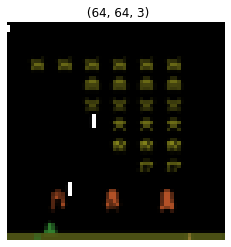

In [38]:
samples = np.load('data/vae_food_3/27096078.npz')
display(samples['obs'][589])

In [18]:
def batch_downsample(batch):
    batch_size = len(batch)
    crop = batch[:, 9:-9, 16:-16]
    blocky = block_reduce(crop, (1,3,2,1), np.max)
    
    # Select top five rows of each frame
    partial = blocky[:, :5, :, :]
    
    # Count the number of non-zero red (in RGB) elements in top section of each frame
    nonzero = np.count_nonzero(partial[:, :, :, 0], axis=(1,2))
    scoreboard = nonzero > 48
    commander  = (~scoreboard) & (nonzero > 0)

    # if commander does not exist, do not process further
    if np.count_nonzero(commander) == 0:
        return None
    
    # smoother resizing method
    blurry = resize(crop, (batch_size, 64, 64, 3), mode='constant')
    
    # remove scoreboard
    blurry[scoreboard, :5] = 0
    
    # whiten bullets
    blurry[blocky[:,:,:,0] == 142] = 1.0
    
    # whiten commandership
    blurry[commander, :5] = np.where(blocky[commander, :5] > 0, 1.0, 0.0)
    
    return blurry

In [19]:
samples = np.load('data/raw_food/1000626761.npz')

In [20]:
b1 = batch_downsample(samples['obs'])
if b1 is None:
    print('None')

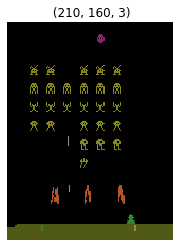

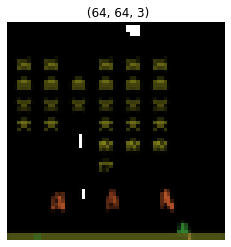

In [21]:
idx = 720
display(samples['obs'][idx])
display(b1[idx])

In [22]:
samples = np.load('data/raw_food/1750857.npz')
b1 = batch_downsample(samples['obs'])
if b1 is None:
    print('None')

None


TypeError: 'NoneType' object is not subscriptable

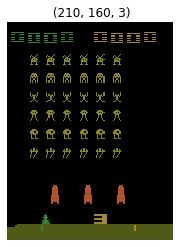

In [23]:
idx = 30
display(samples['obs'][idx])
display(b1[idx])

In [ ]:
def preprocess(root, dest, a, b):
    for filename in os.listdir(root):
        samples = np.load(root + filename)
        obs = batch_downsample(samples['obs'])

def to_number(filename):
    return int(filename[:-4])

In [3]:
def has_commander(image):
    return np.count_nonzero(image[:3, :, :]) > 8

In [38]:
# samples = np.load('data/vae_food_prioritised/61207.npz')
samples = np.load('data/vae_food_prioritised/1000626761.npz')

obs = samples['obs']
obs.shape

(801, 64, 64, 3)

In [5]:
def display(img, title=''):
    plt.figure()
    plt.title(f'{title} {img.shape}')
    plt.axis('off')
    
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

In [40]:
# for i in range(len(obs)):
#     if has_commander(obs[i]):
#         print(i)        

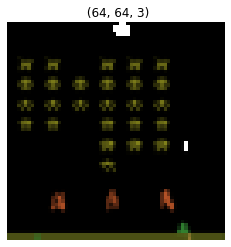

In [43]:
display(obs[710])

In [6]:
def filter_for_commander(obs):
    filtered = []
    for i in range(len(obs)):
        if has_commander(obs[i]):
            filtered.append(obs[i])
    return np.array(filtered)

In [7]:
def highlight_commander(obs):
    for i in range(len(obs)):
        image = obs[i]
        partial = image[:5, :, :]
        partial[np.sum(partial, axis=2) > 0] = 1.0

In [9]:
highlight_commander(obs)

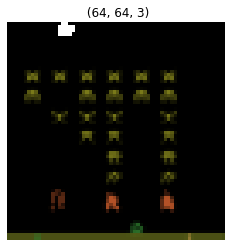

In [13]:
display(obs[760]);

In [38]:
image = obs[600]
partial = image[:5, :, :]
partial[partial > 0] = 1.0 

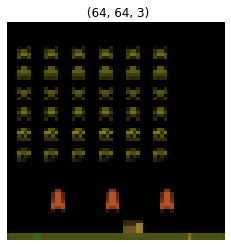

In [41]:
display(obs[6]);

In [14]:
f = filter_for_commander(obs)
print(f.shape)
print(sum( 1 if has_commander(obs[i]) else 0 for i in range(len(obs)) ))
display(f[3])

NameError: name 'filter_for_commander' is not defined

In [8]:
# For white-highligting fix
def commander_files_only(ref, root, dest):
    for filename in os.listdir(ref):
        if not filename.endswith('.npz'):
            continue
        
        obs = np.load(root + filename)['obs']
        highlight_commander(obs)
        
        np.savez_compressed(dest + filename, obs=obs)
        print(f'Saved {filename}')

In [9]:
commander_files_only('data/vae_food_commanders/', 'data/vae_food/', 'data/vae_food_prioritised/')

Saved 1000626761.npz
Saved 1001053853.npz
Saved 1001829789.npz
Saved 1001980164.npz
Saved 1002231553.npz
Saved 1002596297.npz
Saved 1002667418.npz
Saved 1005183729.npz
Saved 1006547279.npz
Saved 1006710316.npz
Saved 1007628743.npz
Saved 1007886505.npz
Saved 1008200306.npz
Saved 1008919310.npz
Saved 1009051873.npz
Saved 1009882064.npz
Saved 1010365639.npz
Saved 1010397289.npz
Saved 1011802584.npz
Saved 1012191294.npz
Saved 1012587433.npz
Saved 1012635507.npz
Saved 1013747358.npz
Saved 1013925798.npz
Saved 1014522773.npz
Saved 101454473.npz
Saved 1015153375.npz
Saved 1015284319.npz
Saved 1015366187.npz
Saved 1015766395.npz
Saved 1015917888.npz
Saved 1016148897.npz
Saved 1016441253.npz
Saved 1016522838.npz
Saved 1016723324.npz
Saved 1016874839.npz
Saved 1017372358.npz
Saved 1018099367.npz
Saved 1018138430.npz
Saved 1018620545.npz
Saved 1018721107.npz
Saved 1019511269.npz
Saved 1021232929.npz
Saved 1021498320.npz
Saved 1021621810.npz
Saved 1021827662.npz
Saved 1022240336.npz
Saved 10223787

Saved 1169491036.npz
Saved 1169493063.npz
Saved 1169700051.npz
Saved 1170204216.npz
Saved 1170422278.npz
Saved 1170797147.npz
Saved 1172111608.npz
Saved 1173427409.npz
Saved 1173702768.npz
Saved 1175317761.npz
Saved 1175698158.npz
Saved 1175744865.npz
Saved 1176050147.npz
Saved 1177731283.npz
Saved 1177800502.npz
Saved 1177941770.npz
Saved 1178362662.npz
Saved 1178541383.npz
Saved 1178972859.npz
Saved 1179087743.npz
Saved 1179382031.npz
Saved 11797529.npz
Saved 1180553416.npz
Saved 1180877524.npz
Saved 1180969292.npz
Saved 1181181331.npz
Saved 1181876366.npz
Saved 1182653282.npz
Saved 1182663937.npz
Saved 1182952433.npz
Saved 1183203327.npz
Saved 1183304469.npz
Saved 118427730.npz
Saved 1184727570.npz
Saved 1184737869.npz
Saved 1185301828.npz
Saved 1186473505.npz
Saved 1186873019.npz
Saved 1187043774.npz
Saved 1187393411.npz
Saved 11875292.npz
Saved 1187976380.npz
Saved 1188205777.npz
Saved 1188727167.npz
Saved 1188798775.npz
Saved 1189139957.npz
Saved 1189569091.npz
Saved 1190023329.n

Saved 1348032296.npz
Saved 1348314387.npz
Saved 134839972.npz
Saved 1348464560.npz
Saved 134863378.npz
Saved 1348652140.npz
Saved 1348816006.npz
Saved 1349131263.npz
Saved 1350050150.npz
Saved 1350250430.npz
Saved 1351061855.npz
Saved 1351619752.npz
Saved 1351971019.npz
Saved 1352713447.npz
Saved 1352737056.npz
Saved 1352775372.npz
Saved 1354046274.npz
Saved 1355125769.npz
Saved 135520383.npz
Saved 135543714.npz
Saved 1355689046.npz
Saved 1356577109.npz
Saved 1357391.npz
Saved 1357484168.npz
Saved 1359044826.npz
Saved 1360256127.npz
Saved 1360371656.npz
Saved 1360765171.npz
Saved 1361416235.npz
Saved 1362095970.npz
Saved 1362552849.npz
Saved 1363150000.npz
Saved 1363445782.npz
Saved 1364473940.npz
Saved 1364491902.npz
Saved 1364993453.npz
Saved 1365148446.npz
Saved 1367215669.npz
Saved 1367813814.npz
Saved 136795821.npz
Saved 1369292342.npz
Saved 1370160178.npz
Saved 1370294911.npz
Saved 1370335413.npz
Saved 1371167719.npz
Saved 1371850224.npz
Saved 1372085420.npz
Saved 1372900111.npz


Saved 1525727374.npz
Saved 1526280596.npz
Saved 1526913984.npz
Saved 1527883417.npz
Saved 1528599451.npz
Saved 1529552983.npz
Saved 1529612042.npz
Saved 1529656203.npz
Saved 1531102001.npz
Saved 1531497551.npz
Saved 1531557830.npz
Saved 1532129369.npz
Saved 1532137539.npz
Saved 1532583422.npz
Saved 1532611118.npz
Saved 1533648474.npz
Saved 1534324526.npz
Saved 1534792568.npz
Saved 1534862311.npz
Saved 1535183330.npz
Saved 1535189122.npz
Saved 1536357318.npz
Saved 1536361359.npz
Saved 153732504.npz
Saved 1537499572.npz
Saved 1537823781.npz
Saved 1538430232.npz
Saved 1538590933.npz
Saved 1538710200.npz
Saved 1539421921.npz
Saved 1540573145.npz
Saved 1541645823.npz
Saved 154229635.npz
Saved 1542539851.npz
Saved 154324388.npz
Saved 1543569353.npz
Saved 1543635180.npz
Saved 1543867188.npz
Saved 154387416.npz
Saved 1544352977.npz
Saved 1544810385.npz
Saved 154506248.npz
Saved 1546371329.npz
Saved 1546525877.npz
Saved 1546544229.npz
Saved 1547439665.npz
Saved 1547582739.npz
Saved 1548371160.n

Saved 1700302433.npz
Saved 1700609877.npz
Saved 17008600.npz
Saved 1701336974.npz
Saved 1701725176.npz
Saved 1702185078.npz
Saved 1702422930.npz
Saved 170249239.npz
Saved 1702775012.npz
Saved 1703384625.npz
Saved 1703866700.npz
Saved 1704484199.npz
Saved 1704562700.npz
Saved 1705114778.npz
Saved 1705141081.npz
Saved 1705207482.npz
Saved 1705256887.npz
Saved 1705557758.npz
Saved 1705710252.npz
Saved 1705809499.npz
Saved 1706303342.npz
Saved 1706825801.npz
Saved 1708046202.npz
Saved 1708082540.npz
Saved 1708548696.npz
Saved 1708585026.npz
Saved 1710648847.npz
Saved 171126175.npz
Saved 1711737189.npz
Saved 1711803599.npz
Saved 171207574.npz
Saved 1713503843.npz
Saved 1713588726.npz
Saved 1713829236.npz
Saved 1714511076.npz
Saved 1715017848.npz
Saved 1715081251.npz
Saved 1716845311.npz
Saved 1717281977.npz
Saved 17177980.npz
Saved 1717908372.npz
Saved 1718214680.npz
Saved 1719094632.npz
Saved 1719095482.npz
Saved 1719136164.npz
Saved 17194009.npz
Saved 1719510456.npz
Saved 1719786085.npz
S

Saved 1888032399.npz
Saved 1888509832.npz
Saved 1889026605.npz
Saved 1889432335.npz
Saved 1890923986.npz
Saved 1891586190.npz
Saved 1891670188.npz
Saved 1892765304.npz
Saved 1893736574.npz
Saved 1894405221.npz
Saved 1894438616.npz
Saved 189453987.npz
Saved 1894875500.npz
Saved 1895482453.npz
Saved 1895822655.npz
Saved 1895931642.npz
Saved 1896046252.npz
Saved 1896555678.npz
Saved 1896664244.npz
Saved 1898545615.npz
Saved 1900343955.npz
Saved 1900455304.npz
Saved 1900501417.npz
Saved 1900528902.npz
Saved 190109717.npz
Saved 1901232506.npz
Saved 1901248086.npz
Saved 1901282917.npz
Saved 1901626027.npz
Saved 1901774403.npz
Saved 190217427.npz
Saved 190300788.npz
Saved 190404640.npz
Saved 190454523.npz
Saved 1905075729.npz
Saved 1905823547.npz
Saved 1905923737.npz
Saved 1906351127.npz
Saved 1907078254.npz
Saved 1907148634.npz
Saved 1907313078.npz
Saved 1908062796.npz
Saved 1908463919.npz
Saved 1908693217.npz
Saved 1910242713.npz
Saved 1910347123.npz
Saved 1910467608.npz
Saved 191142014.npz

Saved 2061699502.npz
Saved 2061998566.npz
Saved 2062158249.npz
Saved 2063479142.npz
Saved 2063605036.npz
Saved 2063862257.npz
Saved 2064403414.npz
Saved 206442034.npz
Saved 2064873751.npz
Saved 2065314683.npz
Saved 2065840734.npz
Saved 2066890091.npz
Saved 2067008349.npz
Saved 2067330415.npz
Saved 2067694076.npz
Saved 2067887388.npz
Saved 2068002929.npz
Saved 2068096468.npz
Saved 2068141075.npz
Saved 2068642232.npz
Saved 2068839520.npz
Saved 2068847476.npz
Saved 2068968060.npz
Saved 2069557070.npz
Saved 206962659.npz
Saved 2069672329.npz
Saved 2069760387.npz
Saved 206999740.npz
Saved 2070127369.npz
Saved 2070414548.npz
Saved 2070568930.npz
Saved 2070949545.npz
Saved 207200291.npz
Saved 2072205965.npz
Saved 2072897697.npz
Saved 2073748086.npz
Saved 2073934626.npz
Saved 2074090307.npz
Saved 2074218650.npz
Saved 2074289346.npz
Saved 2074432020.npz
Saved 207459160.npz
Saved 2074960514.npz
Saved 2075887531.npz
Saved 2076622715.npz
Saved 207742482.npz
Saved 2078312218.npz
Saved 2078378851.np

Saved 315086800.npz
Saved 315384961.npz
Saved 315407824.npz
Saved 315508493.npz
Saved 316177202.npz
Saved 316543633.npz
Saved 316937471.npz
Saved 317672412.npz
Saved 318087081.npz
Saved 318255256.npz
Saved 318939750.npz
Saved 319490158.npz
Saved 319741721.npz
Saved 320480522.npz
Saved 321251998.npz
Saved 322372659.npz
Saved 322474956.npz
Saved 32274455.npz
Saved 322781760.npz
Saved 323094114.npz
Saved 323261288.npz
Saved 324131004.npz
Saved 324823238.npz
Saved 325131243.npz
Saved 325198479.npz
Saved 325594686.npz
Saved 326116898.npz
Saved 326334878.npz
Saved 326512776.npz
Saved 326771311.npz
Saved 327035193.npz
Saved 32711405.npz
Saved 327135308.npz
Saved 327171771.npz
Saved 327239250.npz
Saved 327818760.npz
Saved 327855968.npz
Saved 32946919.npz
Saved 330069563.npz
Saved 330127908.npz
Saved 330202974.npz
Saved 330684503.npz
Saved 331263106.npz
Saved 332093695.npz
Saved 332907798.npz
Saved 333117308.npz
Saved 333366524.npz
Saved 334013925.npz
Saved 335973796.npz
Saved 336154869.npz
Sav

Saved 50094500.npz
Saved 501452646.npz
Saved 501512439.npz
Saved 501653855.npz
Saved 501977210.npz
Saved 502071300.npz
Saved 50233087.npz
Saved 503635212.npz
Saved 504075438.npz
Saved 504311714.npz
Saved 504324096.npz
Saved 504605279.npz
Saved 504659811.npz
Saved 505122789.npz
Saved 505474488.npz
Saved 505531226.npz
Saved 506123815.npz
Saved 506792353.npz
Saved 507699378.npz
Saved 507714970.npz
Saved 507912298.npz
Saved 50809358.npz
Saved 50905848.npz
Saved 509516869.npz
Saved 510847876.npz
Saved 511326121.npz
Saved 512280320.npz
Saved 512456874.npz
Saved 512954180.npz
Saved 513595568.npz
Saved 515152093.npz
Saved 515242750.npz
Saved 515738367.npz
Saved 515985797.npz
Saved 516798763.npz
Saved 517149840.npz
Saved 517996009.npz
Saved 518626244.npz
Saved 519551822.npz
Saved 520155453.npz
Saved 520289526.npz
Saved 520688881.npz
Saved 522031791.npz
Saved 522324885.npz
Saved 522532334.npz
Saved 52307368.npz
Saved 523272768.npz
Saved 523479027.npz
Saved 524310050.npz
Saved 5244223.npz
Saved 5

Saved 676604224.npz
Saved 676776448.npz
Saved 676807190.npz
Saved 676837671.npz
Saved 676868698.npz
Saved 677015734.npz
Saved 677212144.npz
Saved 677487690.npz
Saved 677511604.npz
Saved 677573339.npz
Saved 677675442.npz
Saved 677726561.npz
Saved 678317469.npz
Saved 678465585.npz
Saved 678685639.npz
Saved 679481655.npz
Saved 679891267.npz
Saved 680114492.npz
Saved 68067868.npz
Saved 680923252.npz
Saved 680976720.npz
Saved 681110734.npz
Saved 681271045.npz
Saved 681285957.npz
Saved 681744727.npz
Saved 682015113.npz
Saved 682101610.npz
Saved 682344574.npz
Saved 682379697.npz
Saved 682589502.npz
Saved 68260635.npz
Saved 682953328.npz
Saved 683127384.npz
Saved 683152184.npz
Saved 683179616.npz
Saved 683183771.npz
Saved 683387530.npz
Saved 683651606.npz
Saved 68388121.npz
Saved 684340119.npz
Saved 684612689.npz
Saved 684632509.npz
Saved 684688221.npz
Saved 684918076.npz
Saved 685605132.npz
Saved 686585325.npz
Saved 687045496.npz
Saved 68843417.npz
Saved 688476781.npz
Saved 68850108.npz
Saved

Saved 844589816.npz
Saved 846131280.npz
Saved 846345744.npz
Saved 846397048.npz
Saved 846814293.npz
Saved 846849959.npz
Saved 848358575.npz
Saved 848677085.npz
Saved 849749112.npz
Saved 849981613.npz
Saved 850391608.npz
Saved 850479289.npz
Saved 850640241.npz
Saved 850794315.npz
Saved 85101603.npz
Saved 851338558.npz
Saved 851601073.npz
Saved 851900126.npz
Saved 852173262.npz
Saved 852313193.npz
Saved 852414590.npz
Saved 853722650.npz
Saved 853822705.npz
Saved 853917016.npz
Saved 854126367.npz
Saved 854353072.npz
Saved 855166900.npz
Saved 855345953.npz
Saved 855912543.npz
Saved 856655892.npz
Saved 857117445.npz
Saved 857951715.npz
Saved 859546073.npz
Saved 859984740.npz
Saved 860050407.npz
Saved 860212375.npz
Saved 86123634.npz
Saved 86196417.npz
Saved 862063931.npz
Saved 862377379.npz
Saved 862777788.npz
Saved 863562592.npz
Saved 86385547.npz
Saved 864068393.npz
Saved 864605289.npz
Saved 864737165.npz
Saved 86542284.npz
Saved 86549727.npz
Saved 866193982.npz
Saved 866437236.npz
Saved 

In [35]:
def preprocess(root, dest):
    for filename in os.listdir(root):
        if not filename.endswith('.npz'):
            continue
        
        samples = np.load(root + filename)
        filtered = filter_for_commander(samples['obs'])

        if len(filtered) > 0:
            np.savez_compressed(dest + filename, obs=filtered)
            print(f'Saved {filename}')

In [25]:
preprocess('data/vae_food/', 'data/vae_food_commanders/');

Saved 1000306916.npz
Saved 100044630.npz
Saved 1000596655.npz
Saved 1000626761.npz
Saved 1000999040.npz
Saved 1001053853.npz
Saved 1001336297.npz
Saved 1001470791.npz
Saved 1001829789.npz
Saved 1001980164.npz
Saved 100215569.npz
Saved 1002231553.npz
Saved 1002437873.npz
Saved 1002581730.npz
Saved 1002596297.npz
Saved 1002649772.npz
Saved 1002667418.npz
Saved 1002776075.npz
Saved 1003372240.npz
Saved 1003847475.npz
Saved 1004780158.npz
Saved 1005130918.npz
Saved 100516592.npz
Saved 1005183729.npz
Saved 1005200807.npz
Saved 1006088471.npz
Saved 1006547279.npz
Saved 1006710316.npz
Saved 1006745404.npz
Saved 1007142232.npz
Saved 1007332281.npz
Saved 1007628743.npz
Saved 1007886505.npz
Saved 1008200306.npz
Saved 1008223814.npz
Saved 1008254762.npz
Saved 1008911042.npz
Saved 1008919310.npz
Saved 1009034275.npz
Saved 1009051873.npz
Saved 1009576355.npz
Saved 100971586.npz
Saved 1009730682.npz
Saved 1009733236.npz
Saved 1009819432.npz
Saved 1009882064.npz
Saved 1009987385.npz
Saved 1010089148.

Saved 1071425720.npz
Saved 1071426360.npz
Saved 1071559622.npz
Saved 1071589473.npz
Saved 1071604637.npz
Saved 107176374.npz
Saved 1071957710.npz
Saved 1071974931.npz
Saved 1072052858.npz
Saved 1072264674.npz
Saved 1072574591.npz
Saved 1072695230.npz
Saved 1072703825.npz
Saved 1072749141.npz
Saved 1073901296.npz
Saved 1073975537.npz
Saved 1073976251.npz
Saved 1074119792.npz
Saved 1074811300.npz
Saved 1074935168.npz
Saved 107501956.npz
Saved 1075088022.npz
Saved 1075189830.npz
Saved 1075360515.npz
Saved 1076113963.npz
Saved 1076309120.npz
Saved 1076755141.npz
Saved 1076830686.npz
Saved 1076837032.npz
Saved 107695024.npz
Saved 1077261381.npz
Saved 1077532639.npz
Saved 1077854050.npz
Saved 1077879081.npz
Saved 107800419.npz
Saved 1078314383.npz
Saved 1078399863.npz
Saved 107854836.npz
Saved 1078704350.npz
Saved 1079080852.npz
Saved 1079482524.npz
Saved 1079495745.npz
Saved 1079753087.npz
Saved 1079780648.npz
Saved 1079849702.npz
Saved 1079958715.npz
Saved 1080070064.npz
Saved 1080075521.n

Saved 1142137162.npz
Saved 1142292937.npz
Saved 1142384042.npz
Saved 1142501432.npz
Saved 1142525264.npz
Saved 114277609.npz
Saved 1142786920.npz
Saved 1142816740.npz
Saved 1142916690.npz
Saved 1142940955.npz
Saved 1142997756.npz
Saved 1143176044.npz
Saved 1143518160.npz
Saved 1143848400.npz
Saved 1144426512.npz
Saved 1144771810.npz
Saved 1144959265.npz
Saved 1145140433.npz
Saved 1145310318.npz
Saved 1145542011.npz
Saved 1145592687.npz
Saved 1145674681.npz
Saved 1145901739.npz
Saved 1146003443.npz
Saved 1146071778.npz
Saved 11461529.npz
Saved 1146200541.npz
Saved 1146249239.npz
Saved 1146341540.npz
Saved 1146406947.npz
Saved 1146492987.npz
Saved 1146599461.npz
Saved 1146760415.npz
Saved 1146987030.npz
Saved 1147065208.npz
Saved 1147079455.npz
Saved 1147191917.npz
Saved 1147242010.npz
Saved 114777582.npz
Saved 1148082588.npz
Saved 1148096309.npz
Saved 114823851.npz
Saved 1148312098.npz
Saved 1148442464.npz
Saved 114867542.npz
Saved 1149136913.npz
Saved 1149228398.npz
Saved 1149299977.np

Saved 1210057206.npz
Saved 1210418132.npz
Saved 1210636704.npz
Saved 1210794410.npz
Saved 1210899421.npz
Saved 12115244.npz
Saved 1211597678.npz
Saved 1212158219.npz
Saved 1212295118.npz
Saved 1212621604.npz
Saved 1212899136.npz
Saved 1213416317.npz
Saved 1213566932.npz
Saved 121357279.npz
Saved 1213633071.npz
Saved 1213704230.npz
Saved 1213723182.npz
Saved 1214017012.npz
Saved 121404523.npz
Saved 1214119617.npz
Saved 1214490442.npz
Saved 1214998726.npz
Saved 1215071818.npz
Saved 1215344793.npz
Saved 1215392157.npz
Saved 1215404542.npz
Saved 1215541180.npz
Saved 1215811247.npz
Saved 1215834014.npz
Saved 1216040532.npz
Saved 1216321846.npz
Saved 1216508122.npz
Saved 121653013.npz
Saved 1216602495.npz
Saved 1216639432.npz
Saved 1217632551.npz
Saved 1217815130.npz
Saved 1218357830.npz
Saved 1219298756.npz
Saved 1219574300.npz
Saved 1219693337.npz
Saved 1220132294.npz
Saved 1220271076.npz
Saved 1220470477.npz
Saved 1220573585.npz
Saved 1220626616.npz
Saved 1220827241.npz
Saved 1221101594.n

Saved 1287312173.npz
Saved 1287334043.npz
Saved 1287369291.npz
Saved 1287513240.npz
Saved 128752736.npz
Saved 1288391920.npz
Saved 1288451.npz
Saved 1288578775.npz
Saved 1288658955.npz
Saved 1289079474.npz
Saved 128910944.npz
Saved 1289119594.npz
Saved 1289217943.npz
Saved 1289354247.npz
Saved 1289715498.npz
Saved 1289785564.npz
Saved 1289979380.npz
Saved 1290033179.npz
Saved 1290212931.npz
Saved 1290321030.npz
Saved 1290477062.npz
Saved 1290534493.npz
Saved 1291040281.npz
Saved 1291376828.npz
Saved 1291625094.npz
Saved 1291638929.npz
Saved 1291849151.npz
Saved 1291875529.npz
Saved 1291876053.npz
Saved 1292002054.npz
Saved 129206511.npz
Saved 1292141727.npz
Saved 1292209324.npz
Saved 1292299663.npz
Saved 1292982696.npz
Saved 1293068451.npz
Saved 1293171829.npz
Saved 129330683.npz
Saved 1293422322.npz
Saved 1293453287.npz
Saved 1293504005.npz
Saved 1294289981.npz
Saved 1294581517.npz
Saved 1294657439.npz
Saved 1294719284.npz
Saved 1295047204.npz
Saved 1295197166.npz
Saved 1295198696.npz

Saved 1359812162.npz
Saved 1360084223.npz
Saved 1360129554.npz
Saved 1360256127.npz
Saved 1360371656.npz
Saved 1360441526.npz
Saved 1360765171.npz
Saved 1361210970.npz
Saved 1361416235.npz
Saved 1362095970.npz
Saved 1362401511.npz
Saved 1362552849.npz
Saved 1362628656.npz
Saved 136300862.npz
Saved 1363103499.npz
Saved 1363150000.npz
Saved 13634239.npz
Saved 1363445782.npz
Saved 1363827148.npz
Saved 1364037150.npz
Saved 1364349007.npz
Saved 1364462712.npz
Saved 1364473940.npz
Saved 1364491902.npz
Saved 1364580557.npz
Saved 1364694973.npz
Saved 1364944664.npz
Saved 1364993453.npz
Saved 1365148446.npz
Saved 136517549.npz
Saved 1365575167.npz
Saved 1366524339.npz
Saved 1366863165.npz
Saved 1367075935.npz
Saved 1367215669.npz
Saved 1367678166.npz
Saved 1367813814.npz
Saved 136795821.npz
Saved 1368035185.npz
Saved 1368450326.npz
Saved 1369292342.npz
Saved 1369567633.npz
Saved 1369572404.npz
Saved 1369879912.npz
Saved 1370160178.npz
Saved 1370294911.npz
Saved 1370335413.npz
Saved 1370377791.n

Saved 1433570018.npz
Saved 1433692870.npz
Saved 143395155.npz
Saved 1434119060.npz
Saved 1434312506.npz
Saved 143436113.npz
Saved 1434581635.npz
Saved 1434585815.npz
Saved 1434865455.npz
Saved 1435136630.npz
Saved 1435146089.npz
Saved 1435772289.npz
Saved 1435782634.npz
Saved 1435812981.npz
Saved 1435927279.npz
Saved 1436412164.npz
Saved 1436585079.npz
Saved 1436814263.npz
Saved 1437359602.npz
Saved 143748911.npz
Saved 1437522884.npz
Saved 1437628956.npz
Saved 1437787209.npz
Saved 1437808911.npz
Saved 1437928423.npz
Saved 1437961962.npz
Saved 1438210717.npz
Saved 1438283254.npz
Saved 1438375785.npz
Saved 1438439346.npz
Saved 1438696685.npz
Saved 1438703597.npz
Saved 1439317733.npz
Saved 1439332820.npz
Saved 1439567247.npz
Saved 1439926416.npz
Saved 1440750826.npz
Saved 1440826680.npz
Saved 1440826787.npz
Saved 1440859546.npz
Saved 1440980416.npz
Saved 1441095339.npz
Saved 1441152255.npz
Saved 14411897.npz
Saved 1441632590.npz
Saved 1441774819.npz
Saved 144178407.npz
Saved 144205555.npz

Saved 1505557398.npz
Saved 1505948854.npz
Saved 1505956174.npz
Saved 1506397048.npz
Saved 1506461343.npz
Saved 150661494.npz
Saved 1506750736.npz
Saved 1506847954.npz
Saved 150719624.npz
Saved 1507210160.npz
Saved 1507263871.npz
Saved 1507391262.npz
Saved 1507667625.npz
Saved 1508242705.npz
Saved 1508353594.npz
Saved 1508557348.npz
Saved 1508585788.npz
Saved 1508907309.npz
Saved 1508993229.npz
Saved 1509069346.npz
Saved 1509117540.npz
Saved 1509206995.npz
Saved 1509226841.npz
Saved 1509233692.npz
Saved 1509590965.npz
Saved 1509638053.npz
Saved 1509774955.npz
Saved 1509812746.npz
Saved 1509996052.npz
Saved 1510022668.npz
Saved 1510044236.npz
Saved 1510299804.npz
Saved 1510354681.npz
Saved 1510837270.npz
Saved 1511279388.npz
Saved 1511972013.npz
Saved 1512095845.npz
Saved 1512112458.npz
Saved 1512115236.npz
Saved 1512135233.npz
Saved 1512154583.npz
Saved 1512420760.npz
Saved 1512815580.npz
Saved 1512916254.npz
Saved 1513168427.npz
Saved 1513213573.npz
Saved 151377637.npz
Saved 1514072100

Saved 1583349843.npz
Saved 1583502365.npz
Saved 1583741276.npz
Saved 1583786085.npz
Saved 1583825396.npz
Saved 1584028379.npz
Saved 1584426506.npz
Saved 1584430573.npz
Saved 1584842485.npz
Saved 1585602118.npz
Saved 1585778793.npz
Saved 1585864549.npz
Saved 1585901697.npz
Saved 1585906466.npz
Saved 1585926621.npz
Saved 1586071324.npz
Saved 1586212206.npz
Saved 1586399994.npz
Saved 1587242177.npz
Saved 1587414683.npz
Saved 1587452886.npz
Saved 1587562340.npz
Saved 158758922.npz
Saved 1587932044.npz
Saved 1588096388.npz
Saved 1588130860.npz
Saved 1588205216.npz
Saved 1588446123.npz
Saved 1588579828.npz
Saved 158875537.npz
Saved 158884434.npz
Saved 1589027242.npz
Saved 1589102472.npz
Saved 1589805752.npz
Saved 1589807470.npz
Saved 1589838694.npz
Saved 1590109217.npz
Saved 1590567284.npz
Saved 1590655445.npz
Saved 1590864085.npz
Saved 1590970716.npz
Saved 1591059405.npz
Saved 1591803741.npz
Saved 1592234098.npz
Saved 1592267802.npz
Saved 1592464135.npz
Saved 1592638528.npz
Saved 1592657364

Saved 1657853212.npz
Saved 1657896882.npz
Saved 1657995642.npz
Saved 1658022783.npz
Saved 1658048952.npz
Saved 1658987561.npz
Saved 1659016510.npz
Saved 1659213964.npz
Saved 1659366688.npz
Saved 1659874406.npz
Saved 1660050858.npz
Saved 166011454.npz
Saved 166022532.npz
Saved 1660330286.npz
Saved 166047852.npz
Saved 1660720843.npz
Saved 1661006771.npz
Saved 1661217645.npz
Saved 1661245597.npz
Saved 1661617515.npz
Saved 1661956069.npz
Saved 1661985435.npz
Saved 1662144182.npz
Saved 1662263897.npz
Saved 1662334326.npz
Saved 1662349942.npz
Saved 1662365341.npz
Saved 1662417280.npz
Saved 1662719662.npz
Saved 1662821978.npz
Saved 1662830578.npz
Saved 1662874260.npz
Saved 1663092086.npz
Saved 1663102182.npz
Saved 1663514398.npz
Saved 1663785576.npz
Saved 1663916826.npz
Saved 1663933183.npz
Saved 1664018141.npz
Saved 1664052871.npz
Saved 1664078088.npz
Saved 1664504374.npz
Saved 1664555392.npz
Saved 1664618148.npz
Saved 1664667105.npz
Saved 1664989728.npz
Saved 1665563016.npz
Saved 1665746854

Saved 1724801177.npz
Saved 1724932494.npz
Saved 1725003031.npz
Saved 1725005979.npz
Saved 1725264993.npz
Saved 172527730.npz
Saved 1725335640.npz
Saved 1725744696.npz
Saved 1725780786.npz
Saved 172582892.npz
Saved 1726125992.npz
Saved 1726431807.npz
Saved 172658084.npz
Saved 1726993872.npz
Saved 1727099089.npz
Saved 1727311597.npz
Saved 1727456481.npz
Saved 1727466553.npz
Saved 1727702332.npz
Saved 1727825498.npz
Saved 1728067479.npz
Saved 1728201945.npz
Saved 1728237089.npz
Saved 1728276747.npz
Saved 1728363639.npz
Saved 1728546591.npz
Saved 172857185.npz
Saved 1728967134.npz
Saved 1729019734.npz
Saved 1729091839.npz
Saved 1729134803.npz
Saved 1729417378.npz
Saved 1729918924.npz
Saved 1730329771.npz
Saved 1730809381.npz
Saved 1730936476.npz
Saved 1731700052.npz
Saved 1732031895.npz
Saved 173215992.npz
Saved 1732186941.npz
Saved 1732729008.npz
Saved 17328361.npz
Saved 1733138765.npz
Saved 1733218052.npz
Saved 1733308258.npz
Saved 1733396399.npz
Saved 1733647626.npz
Saved 1733654865.npz

Saved 1800061923.npz
Saved 1800345412.npz
Saved 1800350680.npz
Saved 1800408695.npz
Saved 180076660.npz
Saved 1800814843.npz
Saved 180117227.npz
Saved 1801453597.npz
Saved 1801517811.npz
Saved 180177820.npz
Saved 1801812625.npz
Saved 1801922921.npz
Saved 1801987814.npz
Saved 1801996845.npz
Saved 1802337383.npz
Saved 1802358494.npz
Saved 1802371154.npz
Saved 1802737190.npz
Saved 1802877324.npz
Saved 1803062434.npz
Saved 1803106049.npz
Saved 1803220239.npz
Saved 180419276.npz
Saved 1805258612.npz
Saved 1805289680.npz
Saved 1805464862.npz
Saved 1805919327.npz
Saved 180604264.npz
Saved 1806178182.npz
Saved 1806218197.npz
Saved 1806264776.npz
Saved 1806473436.npz
Saved 1807144705.npz
Saved 1807254169.npz
Saved 1807427016.npz
Saved 1807579386.npz
Saved 1807609031.npz
Saved 1807839970.npz
Saved 1808056697.npz
Saved 1808331146.npz
Saved 1808331418.npz
Saved 1808448191.npz
Saved 1808713253.npz
Saved 1808914326.npz
Saved 1809109443.npz
Saved 1809338259.npz
Saved 1810081233.npz
Saved 1810184704.n

Saved 1876130104.npz
Saved 1876367344.npz
Saved 1876582501.npz
Saved 1876583375.npz
Saved 1876767581.npz
Saved 1876991678.npz
Saved 1877229250.npz
Saved 187726954.npz
Saved 1877371913.npz
Saved 1877489673.npz
Saved 1877622063.npz
Saved 1877791805.npz
Saved 1877821847.npz
Saved 18779153.npz
Saved 1878454743.npz
Saved 1878563106.npz
Saved 1879307601.npz
Saved 1879428028.npz
Saved 18795606.npz
Saved 1879565761.npz
Saved 1879873877.npz
Saved 1879894862.npz
Saved 1879899045.npz
Saved 1880043630.npz
Saved 1880614967.npz
Saved 1880875119.npz
Saved 1881442328.npz
Saved 1881543054.npz
Saved 1881586752.npz
Saved 1881681157.npz
Saved 1881776025.npz
Saved 1881850360.npz
Saved 1881922240.npz
Saved 1882494137.npz
Saved 188297646.npz
Saved 1883042307.npz
Saved 1883665631.npz
Saved 1883957793.npz
Saved 1884229760.npz
Saved 1884408525.npz
Saved 1884486716.npz
Saved 1884573114.npz
Saved 1884928392.npz
Saved 1884957311.npz
Saved 1885040721.npz
Saved 1885158223.npz
Saved 1885457114.npz
Saved 1885676875.np

Saved 1952784949.npz
Saved 1953114410.npz
Saved 1953175797.npz
Saved 1953370436.npz
Saved 1953370590.npz
Saved 1954068037.npz
Saved 1954108030.npz
Saved 1954164143.npz
Saved 1954604.npz
Saved 1954660578.npz
Saved 1954973006.npz
Saved 195501960.npz
Saved 1955046686.npz
Saved 1955047344.npz
Saved 1955297010.npz
Saved 1955392693.npz
Saved 19557487.npz
Saved 195580170.npz
Saved 1955932505.npz
Saved 1956079142.npz
Saved 1956092488.npz
Saved 195610199.npz
Saved 1956147657.npz
Saved 1956281548.npz
Saved 1956451277.npz
Saved 1956815793.npz
Saved 1956886597.npz
Saved 1957334021.npz
Saved 1957713574.npz
Saved 1957779258.npz
Saved 1958023081.npz
Saved 1958430517.npz
Saved 1958837132.npz
Saved 1959048507.npz
Saved 1959533566.npz
Saved 1959763406.npz
Saved 1959831995.npz
Saved 19601460.npz
Saved 1960171073.npz
Saved 1960256165.npz
Saved 1960540752.npz
Saved 1960708229.npz
Saved 1960929554.npz
Saved 1961047308.npz
Saved 1961065140.npz
Saved 1962009861.npz
Saved 1962174738.npz
Saved 1962212658.npz
Sa

Saved 2025261011.npz
Saved 2025415378.npz
Saved 2025427040.npz
Saved 2025491174.npz
Saved 2025573937.npz
Saved 2025740350.npz
Saved 2025823333.npz
Saved 2025839876.npz
Saved 2026064333.npz
Saved 2026975253.npz
Saved 2026993078.npz
Saved 2027130433.npz
Saved 2027197784.npz
Saved 2027440317.npz
Saved 2027444988.npz
Saved 2027599707.npz
Saved 2027627429.npz
Saved 2028481476.npz
Saved 2028583470.npz
Saved 2028705391.npz
Saved 2028808790.npz
Saved 2029060570.npz
Saved 2029140323.npz
Saved 2029473606.npz
Saved 2029775650.npz
Saved 2029981301.npz
Saved 2030173455.npz
Saved 2030289281.npz
Saved 2030463993.npz
Saved 2030734596.npz
Saved 2031262411.npz
Saved 2031289580.npz
Saved 2031356539.npz
Saved 2031706574.npz
Saved 2031753192.npz
Saved 2032006338.npz
Saved 2032798419.npz
Saved 2032875611.npz
Saved 2032995905.npz
Saved 2033000527.npz
Saved 203302594.npz
Saved 2033053303.npz
Saved 2033241473.npz
Saved 2033678793.npz
Saved 2033748789.npz
Saved 2033928146.npz
Saved 2034309448.npz
Saved 20343153

Saved 2097860478.npz
Saved 2098105583.npz
Saved 209814832.npz
Saved 2098410565.npz
Saved 2098538820.npz
Saved 209862269.npz
Saved 2098816182.npz
Saved 2098956932.npz
Saved 2098977063.npz
Saved 2099223736.npz
Saved 2099612952.npz
Saved 2099763704.npz
Saved 210072385.npz
Saved 2100999822.npz
Saved 210105118.npz
Saved 2101319978.npz
Saved 2101663339.npz
Saved 2101697639.npz
Saved 2101880023.npz
Saved 210196860.npz
Saved 2102233354.npz
Saved 2102308288.npz
Saved 2102397875.npz
Saved 2102461692.npz
Saved 2102495989.npz
Saved 2102539923.npz
Saved 2102685988.npz
Saved 2102879487.npz
Saved 210313343.npz
Saved 2103276854.npz
Saved 2103704745.npz
Saved 2103735179.npz
Saved 2103878905.npz
Saved 2104107.npz
Saved 2104207447.npz
Saved 2104399676.npz
Saved 2104403555.npz
Saved 2104520913.npz
Saved 2104832272.npz
Saved 2104840702.npz
Saved 2105090092.npz
Saved 2105556707.npz
Saved 2105874232.npz
Saved 2105949912.npz
Saved 2106090420.npz
Saved 210612795.npz
Saved 2106169827.npz
Saved 2106179799.npz
Sa

Saved 241594222.npz
Saved 241731667.npz
Saved 242151251.npz
Saved 242394787.npz
Saved 242876493.npz
Saved 242945947.npz
Saved 243592679.npz
Saved 243607011.npz
Saved 243665391.npz
Saved 24395540.npz
Saved 244006542.npz
Saved 244019341.npz
Saved 24410464.npz
Saved 244122482.npz
Saved 244320514.npz
Saved 244671922.npz
Saved 244679545.npz
Saved 244702642.npz
Saved 244781039.npz
Saved 245118088.npz
Saved 245189579.npz
Saved 245285018.npz
Saved 245340324.npz
Saved 245347199.npz
Saved 245387905.npz
Saved 245437085.npz
Saved 245780458.npz
Saved 24583303.npz
Saved 246445637.npz
Saved 246566947.npz
Saved 246637405.npz
Saved 246788192.npz
Saved 246824393.npz
Saved 246981056.npz
Saved 247160325.npz
Saved 247287777.npz
Saved 247436804.npz
Saved 247573797.npz
Saved 247948286.npz
Saved 247985083.npz
Saved 248337187.npz
Saved 248711857.npz
Saved 248948615.npz
Saved 249017006.npz
Saved 249204343.npz
Saved 249295872.npz
Saved 249401728.npz
Saved 249429627.npz
Saved 249560527.npz
Saved 249793713.npz
Sav

Saved 314164758.npz
Saved 314449793.npz
Saved 314699284.npz
Saved 31479110.npz
Saved 314833058.npz
Saved 314936929.npz
Saved 314981333.npz
Saved 315086800.npz
Saved 315318650.npz
Saved 315384961.npz
Saved 315407824.npz
Saved 315508493.npz
Saved 316177202.npz
Saved 316180071.npz
Saved 31642373.npz
Saved 316543633.npz
Saved 316750083.npz
Saved 316910290.npz
Saved 316937471.npz
Saved 317001053.npz
Saved 317672412.npz
Saved 31778231.npz
Saved 317946909.npz
Saved 318087081.npz
Saved 318255256.npz
Saved 318275274.npz
Saved 318297013.npz
Saved 318593075.npz
Saved 318838036.npz
Saved 318939750.npz
Saved 318962548.npz
Saved 319054258.npz
Saved 319183430.npz
Saved 319235755.npz
Saved 319307597.npz
Saved 319363024.npz
Saved 319490158.npz
Saved 319741721.npz
Saved 319806082.npz
Saved 320099850.npz
Saved 320480522.npz
Saved 32051237.npz
Saved 320931777.npz
Saved 321246583.npz
Saved 321251998.npz
Saved 321491500.npz
Saved 321783918.npz
Saved 322075413.npz
Saved 322227050.npz
Saved 322372659.npz
Save

Saved 393778270.npz
Saved 393998811.npz
Saved 395388174.npz
Saved 395515456.npz
Saved 395859725.npz
Saved 396176516.npz
Saved 396314927.npz
Saved 396615001.npz
Saved 396724193.npz
Saved 396901740.npz
Saved 396960611.npz
Saved 39712126.npz
Saved 397339001.npz
Saved 397520636.npz
Saved 397709088.npz
Saved 397990237.npz
Saved 398102181.npz
Saved 398187690.npz
Saved 398552220.npz
Saved 39856483.npz
Saved 398688695.npz
Saved 398902908.npz
Saved 399228213.npz
Saved 399588322.npz
Saved 40015981.npz
Saved 400215489.npz
Saved 400346076.npz
Saved 400401828.npz
Saved 400582531.npz
Saved 400635965.npz
Saved 400645783.npz
Saved 400975737.npz
Saved 401083017.npz
Saved 401186489.npz
Saved 401596586.npz
Saved 401652518.npz
Saved 401731590.npz
Saved 401974578.npz
Saved 40273381.npz
Saved 402858422.npz
Saved 402887440.npz
Saved 402954157.npz
Saved 403101838.npz
Saved 403127151.npz
Saved 403441167.npz
Saved 403488003.npz
Saved 403893024.npz
Saved 40417988.npz
Saved 404237026.npz
Saved 404464269.npz
Saved

Saved 468152957.npz
Saved 468219106.npz
Saved 468362354.npz
Saved 469343547.npz
Saved 46943883.npz
Saved 469609505.npz
Saved 469683411.npz
Saved 469886243.npz
Saved 470070711.npz
Saved 470162396.npz
Saved 47027203.npz
Saved 470394852.npz
Saved 470511917.npz
Saved 471173013.npz
Saved 471232889.npz
Saved 471652239.npz
Saved 471963694.npz
Saved 472029966.npz
Saved 47220063.npz
Saved 472230944.npz
Saved 472828180.npz
Saved 472999924.npz
Saved 473329543.npz
Saved 473744405.npz
Saved 473764529.npz
Saved 473775878.npz
Saved 474011531.npz
Saved 474184435.npz
Saved 47448748.npz
Saved 474601347.npz
Saved 474762792.npz
Saved 474787228.npz
Saved 475401122.npz
Saved 475606123.npz
Saved 475948269.npz
Saved 47612601.npz
Saved 476208528.npz
Saved 476308150.npz
Saved 476450816.npz
Saved 47658824.npz
Saved 476614464.npz
Saved 476781949.npz
Saved 476942356.npz
Saved 477025437.npz
Saved 477224333.npz
Saved 477358034.npz
Saved 477805379.npz
Saved 477926332.npz
Saved 478122851.npz
Saved 478252371.npz
Saved 

Saved 548250219.npz
Saved 548314884.npz
Saved 548417692.npz
Saved 548792645.npz
Saved 549141240.npz
Saved 549310925.npz
Saved 549436031.npz
Saved 549488561.npz
Saved 549868454.npz
Saved 549869018.npz
Saved 549943836.npz
Saved 549959585.npz
Saved 550037804.npz
Saved 550300228.npz
Saved 550319409.npz
Saved 55052184.npz
Saved 55101411.npz
Saved 55104174.npz
Saved 551149999.npz
Saved 551305292.npz
Saved 551349463.npz
Saved 551486479.npz
Saved 551585942.npz
Saved 55198693.npz
Saved 552077270.npz
Saved 552209340.npz
Saved 552294793.npz
Saved 552582668.npz
Saved 55259324.npz
Saved 552877216.npz
Saved 552965822.npz
Saved 553355903.npz
Saved 55375182.npz
Saved 554682539.npz
Saved 554838013.npz
Saved 554864125.npz
Saved 55499537.npz
Saved 555011925.npz
Saved 555112469.npz
Saved 5551705.npz
Saved 555523150.npz
Saved 555553294.npz
Saved 555560707.npz
Saved 555578242.npz
Saved 555810013.npz
Saved 555932639.npz
Saved 556033859.npz
Saved 556039478.npz
Saved 556124519.npz
Saved 556420277.npz
Saved 556

Saved 622254361.npz
Saved 62241237.npz
Saved 622519422.npz
Saved 622527885.npz
Saved 622932443.npz
Saved 623176039.npz
Saved 623233701.npz
Saved 623750858.npz
Saved 624962271.npz
Saved 624969899.npz
Saved 6251609.npz
Saved 625374659.npz
Saved 625545113.npz
Saved 626089447.npz
Saved 626162224.npz
Saved 626481188.npz
Saved 626759451.npz
Saved 626878501.npz
Saved 627083436.npz
Saved 627137865.npz
Saved 627195727.npz
Saved 627328540.npz
Saved 627531914.npz
Saved 627578679.npz
Saved 627707785.npz
Saved 627858.npz
Saved 627926010.npz
Saved 628035411.npz
Saved 628340518.npz
Saved 628536964.npz
Saved 62860353.npz
Saved 628642841.npz
Saved 628946400.npz
Saved 629211103.npz
Saved 62934498.npz
Saved 629388550.npz
Saved 629452654.npz
Saved 629562380.npz
Saved 629850715.npz
Saved 629851341.npz
Saved 630017379.npz
Saved 630029670.npz
Saved 630074879.npz
Saved 630199581.npz
Saved 630462344.npz
Saved 630593743.npz
Saved 630884692.npz
Saved 631105651.npz
Saved 631410199.npz
Saved 632342109.npz
Saved 63

Saved 694175891.npz
Saved 694364508.npz
Saved 694443390.npz
Saved 694774046.npz
Saved 69479752.npz
Saved 694884193.npz
Saved 694962254.npz
Saved 695092639.npz
Saved 695483821.npz
Saved 695630053.npz
Saved 695777794.npz
Saved 695854397.npz
Saved 695863938.npz
Saved 696008173.npz
Saved 69611344.npz
Saved 696335828.npz
Saved 696526208.npz
Saved 69656539.npz
Saved 696920818.npz
Saved 69706963.npz
Saved 697083890.npz
Saved 697151258.npz
Saved 697307411.npz
Saved 69732965.npz
Saved 697392579.npz
Saved 697479132.npz
Saved 697553445.npz
Saved 697600362.npz
Saved 698864283.npz
Saved 699086491.npz
Saved 699137674.npz
Saved 69918059.npz
Saved 699356127.npz
Saved 69959911.npz
Saved 699671050.npz
Saved 699745401.npz
Saved 700138948.npz
Saved 700315094.npz
Saved 700322322.npz
Saved 700690067.npz
Saved 701432783.npz
Saved 701449766.npz
Saved 701491545.npz
Saved 701674668.npz
Saved 702042559.npz
Saved 702125960.npz
Saved 702305456.npz
Saved 70248799.npz
Saved 702544190.npz
Saved 703140110.npz
Saved 70

Saved 768181591.npz
Saved 76821700.npz
Saved 768648114.npz
Saved 768709752.npz
Saved 768736871.npz
Saved 768986499.npz
Saved 768999584.npz
Saved 769095991.npz
Saved 769220451.npz
Saved 769345124.npz
Saved 769365418.npz
Saved 769403481.npz
Saved 769543796.npz
Saved 769555372.npz
Saved 769907699.npz
Saved 770056761.npz
Saved 770100650.npz
Saved 770204275.npz
Saved 770273165.npz
Saved 770293354.npz
Saved 770590839.npz
Saved 770597092.npz
Saved 770714198.npz
Saved 771071371.npz
Saved 771424812.npz
Saved 771425105.npz
Saved 7719890.npz
Saved 772210032.npz
Saved 772388748.npz
Saved 772515631.npz
Saved 77255509.npz
Saved 773158915.npz
Saved 773356366.npz
Saved 773510880.npz
Saved 77352377.npz
Saved 773713930.npz
Saved 773866548.npz
Saved 773867608.npz
Saved 773912285.npz
Saved 774061337.npz
Saved 774220906.npz
Saved 774362521.npz
Saved 774428039.npz
Saved 774701883.npz
Saved 774897131.npz
Saved 774989277.npz
Saved 775051423.npz
Saved 775422427.npz
Saved 775579576.npz
Saved 775696191.npz
Saved

Saved 838435798.npz
Saved 838519173.npz
Saved 838677841.npz
Saved 838748871.npz
Saved 839086510.npz
Saved 839416217.npz
Saved 839770459.npz
Saved 839922178.npz
Saved 840057309.npz
Saved 840109995.npz
Saved 840118641.npz
Saved 840302451.npz
Saved 84042385.npz
Saved 840658244.npz
Saved 840744652.npz
Saved 840769962.npz
Saved 840817649.npz
Saved 841052289.npz
Saved 841216894.npz
Saved 841223443.npz
Saved 841236535.npz
Saved 841394604.npz
Saved 841613045.npz
Saved 841961063.npz
Saved 842102187.npz
Saved 842526963.npz
Saved 842565059.npz
Saved 843070796.npz
Saved 843196183.npz
Saved 843223173.npz
Saved 843496247.npz
Saved 843546432.npz
Saved 843608333.npz
Saved 844050847.npz
Saved 844101743.npz
Saved 844208738.npz
Saved 844246348.npz
Saved 844589816.npz
Saved 845321079.npz
Saved 846131280.npz
Saved 846345744.npz
Saved 846397048.npz
Saved 846814293.npz
Saved 846849959.npz
Saved 846925390.npz
Saved 847010894.npz
Saved 847212750.npz
Saved 847256230.npz
Saved 847327676.npz
Saved 847540628.npz
S

Saved 913286847.npz
Saved 913542377.npz
Saved 91361037.npz
Saved 913641275.npz
Saved 913736645.npz
Saved 914252815.npz
Saved 914464300.npz
Saved 914496413.npz
Saved 914683918.npz
Saved 914888405.npz
Saved 914948008.npz
Saved 914982088.npz
Saved 915064156.npz
Saved 915310909.npz
Saved 915382538.npz
Saved 915405732.npz
Saved 915457918.npz
Saved 915544403.npz
Saved 915644025.npz
Saved 915930619.npz
Saved 916257050.npz
Saved 916274450.npz
Saved 916432676.npz
Saved 916459565.npz
Saved 916611240.npz
Saved 916710455.npz
Saved 91695358.npz
Saved 917015986.npz
Saved 917195657.npz
Saved 917647386.npz
Saved 917695899.npz
Saved 917815418.npz
Saved 918571952.npz
Saved 918623920.npz
Saved 918662149.npz
Saved 918777510.npz
Saved 918829898.npz
Saved 918877883.npz
Saved 919065350.npz
Saved 919347112.npz
Saved 919370540.npz
Saved 919574473.npz
Saved 919619609.npz
Saved 919781663.npz
Saved 919913540.npz
Saved 919990735.npz
Saved 919998257.npz
Saved 920065474.npz
Saved 920177753.npz
Saved 920194618.npz
Sa

Saved 985759370.npz
Saved 98578723.npz
Saved 986337312.npz
Saved 986393933.npz
Saved 986406629.npz
Saved 986534480.npz
Saved 986538083.npz
Saved 986619135.npz
Saved 986643189.npz
Saved 986672288.npz
Saved 986847589.npz
Saved 986853741.npz
Saved 987090552.npz
Saved 987125430.npz
Saved 987558976.npz
Saved 987894580.npz
Saved 9887627.npz
Saved 988969288.npz
Saved 989277942.npz
Saved 989431199.npz
Saved 989688082.npz
Saved 989824222.npz
Saved 989844940.npz
Saved 989878241.npz
Saved 99001788.npz
Saved 990018040.npz
Saved 990724102.npz
Saved 990828286.npz
Saved 990963832.npz
Saved 990966721.npz
Saved 99102333.npz
Saved 991939946.npz
Saved 99217365.npz
Saved 99260476.npz
Saved 992662531.npz
Saved 992770947.npz
Saved 993077756.npz
Saved 993663449.npz
Saved 993923841.npz
Saved 994050017.npz
Saved 994064546.npz
Saved 994228886.npz
Saved 994325818.npz
Saved 994421645.npz
Saved 994442515.npz
Saved 994496944.npz
Saved 994538818.npz
Saved 994755590.npz
Saved 994774467.npz
Saved 99527828.npz
Saved 99

In [9]:
def remove_empty(root):
    for filename in os.listdir(root):
        if not filename.endswith('.npz'):
            continue
        
        remove = False
        with np.load(root + filename) as samples:
            if len(samples['obs']) == 0:
                remove = True
        
        if remove:
            os.remove(root + filename)
            print(f'Deleted {filename}')

In [10]:
remove_empty('data/vae_food_commanders/')

Deleted 1000306916.npz
Deleted 100044630.npz
Deleted 1000596655.npz
Deleted 1000999040.npz
Deleted 1001336297.npz
Deleted 1001470791.npz
Deleted 100215569.npz
Deleted 1002437873.npz
Deleted 1002581730.npz
Deleted 1002649772.npz
Deleted 1002776075.npz
Deleted 1003372240.npz
Deleted 1003847475.npz
Deleted 1004780158.npz
Deleted 1005130918.npz
Deleted 100516592.npz
Deleted 1005200807.npz
Deleted 1006088471.npz
Deleted 1006745404.npz
Deleted 1007142232.npz
Deleted 1007332281.npz
Deleted 1008223814.npz
Deleted 1008254762.npz
Deleted 1008911042.npz
Deleted 1009034275.npz
Deleted 1009576355.npz
Deleted 100971586.npz
Deleted 1009730682.npz
Deleted 1009733236.npz
Deleted 1009819432.npz
Deleted 1009987385.npz
Deleted 1010089148.npz
Deleted 1010418560.npz
Deleted 1011104171.npz
Deleted 1011226993.npz
Deleted 1011647233.npz
Deleted 1011829784.npz
Deleted 1012191370.npz
Deleted 1012225820.npz
Deleted 1012259143.npz
Deleted 1012261803.npz
Deleted 1012506388.npz
Deleted 1012552392.npz
Deleted 1012677

Deleted 1112721213.npz
Deleted 1112941688.npz
Deleted 1112984253.npz
Deleted 1113341541.npz
Deleted 1113361466.npz
Deleted 1113436129.npz
Deleted 1114321241.npz
Deleted 11144774.npz
Deleted 1114752816.npz
Deleted 1115880259.npz
Deleted 1116135670.npz
Deleted 1116235240.npz
Deleted 1116257213.npz
Deleted 1116350750.npz
Deleted 1116872821.npz
Deleted 1116907251.npz
Deleted 111705744.npz
Deleted 1117231816.npz
Deleted 111728.npz
Deleted 1117457001.npz
Deleted 1117780249.npz
Deleted 1117794203.npz
Deleted 1117884239.npz
Deleted 1117977622.npz
Deleted 111823841.npz
Deleted 1118416652.npz
Deleted 1118994427.npz
Deleted 1119509096.npz
Deleted 1119510000.npz
Deleted 1119556050.npz
Deleted 1119948964.npz
Deleted 112011623.npz
Deleted 1120189162.npz
Deleted 1120189368.npz
Deleted 1120264298.npz
Deleted 1120374073.npz
Deleted 1121062973.npz
Deleted 112145498.npz
Deleted 1121695666.npz
Deleted 1121776450.npz
Deleted 1121947465.npz
Deleted 1122817224.npz
Deleted 1123856193.npz
Deleted 1123991684.np

Deleted 1227325844.npz
Deleted 1228339501.npz
Deleted 1228499715.npz
Deleted 122934580.npz
Deleted 1229418205.npz
Deleted 1229859477.npz
Deleted 1230173045.npz
Deleted 1230434503.npz
Deleted 1230800543.npz
Deleted 1231653739.npz
Deleted 123206205.npz
Deleted 1232116486.npz
Deleted 1232583427.npz
Deleted 1232848474.npz
Deleted 1233075331.npz
Deleted 1233424240.npz
Deleted 1234073533.npz
Deleted 1234371037.npz
Deleted 123498803.npz
Deleted 1235209996.npz
Deleted 1235798365.npz
Deleted 1235890830.npz
Deleted 1236243764.npz
Deleted 123652113.npz
Deleted 1236621675.npz
Deleted 1236646005.npz
Deleted 1237272702.npz
Deleted 1237735479.npz
Deleted 1237982580.npz
Deleted 1238137070.npz
Deleted 1238526215.npz
Deleted 1238621558.npz
Deleted 1238725640.npz
Deleted 1238978191.npz
Deleted 1239029064.npz
Deleted 1240014501.npz
Deleted 124019360.npz
Deleted 1241087394.npz
Deleted 1241472606.npz
Deleted 1241793606.npz
Deleted 124199687.npz
Deleted 1242007439.npz
Deleted 1242267566.npz
Deleted 124227248

Deleted 1335613557.npz
Deleted 1336261207.npz
Deleted 1336472007.npz
Deleted 1336588798.npz
Deleted 1336745756.npz
Deleted 1337587183.npz
Deleted 1338073020.npz
Deleted 1338268262.npz
Deleted 1338679970.npz
Deleted 1338852440.npz
Deleted 1338907290.npz
Deleted 1339018987.npz
Deleted 133950129.npz
Deleted 1339850331.npz
Deleted 1340270063.npz
Deleted 1340634015.npz
Deleted 134085892.npz
Deleted 1341181221.npz
Deleted 134130183.npz
Deleted 1341310076.npz
Deleted 1341442001.npz
Deleted 1341458708.npz
Deleted 13417869.npz
Deleted 1341791783.npz
Deleted 1341967553.npz
Deleted 1342149649.npz
Deleted 1342698833.npz
Deleted 1343076448.npz
Deleted 1343331002.npz
Deleted 1344061858.npz
Deleted 13440832.npz
Deleted 134732611.npz
Deleted 1348229841.npz
Deleted 1348453143.npz
Deleted 1348492777.npz
Deleted 134854163.npz
Deleted 134882847.npz
Deleted 1349759045.npz
Deleted 1351066871.npz
Deleted 1351096684.npz
Deleted 1351272674.npz
Deleted 1351573100.npz
Deleted 1351843099.npz
Deleted 1352036092.np

Deleted 1448989975.npz
Deleted 1449222637.npz
Deleted 1449338623.npz
Deleted 1450845084.npz
Deleted 1451233032.npz
Deleted 1451243509.npz
Deleted 1452303052.npz
Deleted 145254162.npz
Deleted 1452717426.npz
Deleted 1452999107.npz
Deleted 1453830157.npz
Deleted 145416056.npz
Deleted 1454614081.npz
Deleted 1454656947.npz
Deleted 1455204569.npz
Deleted 1455283437.npz
Deleted 1455653741.npz
Deleted 1455705839.npz
Deleted 1455798328.npz
Deleted 1455950378.npz
Deleted 1456004188.npz
Deleted 1456306444.npz
Deleted 1456364015.npz
Deleted 145647311.npz
Deleted 1456757585.npz
Deleted 1457351798.npz
Deleted 1457526942.npz
Deleted 1458779729.npz
Deleted 1459303770.npz
Deleted 1459691468.npz
Deleted 1459901019.npz
Deleted 1460708521.npz
Deleted 1461601971.npz
Deleted 1464182915.npz
Deleted 1464247506.npz
Deleted 1464803740.npz
Deleted 146498264.npz
Deleted 1465141140.npz
Deleted 1465692988.npz
Deleted 1466146687.npz
Deleted 1466209488.npz
Deleted 1466478110.npz
Deleted 1466831322.npz
Deleted 1466988

Deleted 1575177242.npz
Deleted 1575238748.npz
Deleted 1576312484.npz
Deleted 1576736148.npz
Deleted 157685468.npz
Deleted 1577498978.npz
Deleted 1577547635.npz
Deleted 1577652766.npz
Deleted 1578589938.npz
Deleted 1578773662.npz
Deleted 1578867512.npz
Deleted 1579312415.npz
Deleted 1579883516.npz
Deleted 1580032441.npz
Deleted 1580340392.npz
Deleted 1580751279.npz
Deleted 1581097719.npz
Deleted 1581210305.npz
Deleted 1581253637.npz
Deleted 1581745788.npz
Deleted 1581833181.npz
Deleted 1581980338.npz
Deleted 1582233718.npz
Deleted 1582350910.npz
Deleted 1582427503.npz
Deleted 1582528503.npz
Deleted 1583343311.npz
Deleted 1583502365.npz
Deleted 1583741276.npz
Deleted 1583786085.npz
Deleted 1584028379.npz
Deleted 1584426506.npz
Deleted 1584842485.npz
Deleted 1585602118.npz
Deleted 1585864549.npz
Deleted 1585906466.npz
Deleted 1585926621.npz
Deleted 1586071324.npz
Deleted 1586212206.npz
Deleted 1586399994.npz
Deleted 1587242177.npz
Deleted 1587414683.npz
Deleted 1587452886.npz
Deleted 1587

Deleted 1686785331.npz
Deleted 1687748909.npz
Deleted 1687783006.npz
Deleted 1687806046.npz
Deleted 1688541311.npz
Deleted 1688617474.npz
Deleted 1688993657.npz
Deleted 1689029644.npz
Deleted 1689103904.npz
Deleted 1689356270.npz
Deleted 1689793180.npz
Deleted 1690164334.npz
Deleted 1690250264.npz
Deleted 1690564618.npz
Deleted 1691313185.npz
Deleted 1691396151.npz
Deleted 1691515302.npz
Deleted 16917044.npz
Deleted 1691776500.npz
Deleted 169212831.npz
Deleted 1692175681.npz
Deleted 1692244489.npz
Deleted 1692681539.npz
Deleted 169275634.npz
Deleted 16930941.npz
Deleted 16934807.npz
Deleted 1693928538.npz
Deleted 1694026477.npz
Deleted 1694185195.npz
Deleted 1694336496.npz
Deleted 169487989.npz
Deleted 1695917206.npz
Deleted 169615230.npz
Deleted 16961761.npz
Deleted 1696488343.npz
Deleted 1697050217.npz
Deleted 1697130860.npz
Deleted 1697728754.npz
Deleted 1697934911.npz
Deleted 1698699498.npz
Deleted 1699852645.npz
Deleted 1700127556.npz
Deleted 1700464414.npz
Deleted 1701207117.npz


Deleted 1800061923.npz
Deleted 1800345412.npz
Deleted 1800408695.npz
Deleted 1801453597.npz
Deleted 1801517811.npz
Deleted 180177820.npz
Deleted 1801812625.npz
Deleted 1801987814.npz
Deleted 1801996845.npz
Deleted 1802737190.npz
Deleted 1802877324.npz
Deleted 1803062434.npz
Deleted 1803106049.npz
Deleted 1803220239.npz
Deleted 180419276.npz
Deleted 1805258612.npz
Deleted 1805919327.npz
Deleted 180604264.npz
Deleted 1806473436.npz
Deleted 1807254169.npz
Deleted 1807427016.npz
Deleted 1807579386.npz
Deleted 1807609031.npz
Deleted 1808056697.npz
Deleted 1808331418.npz
Deleted 1809109443.npz
Deleted 1810081233.npz
Deleted 1810202028.npz
Deleted 1811021963.npz
Deleted 1811237222.npz
Deleted 1811305968.npz
Deleted 1811412172.npz
Deleted 1811694849.npz
Deleted 1811734648.npz
Deleted 1811846642.npz
Deleted 1812268042.npz
Deleted 1812480717.npz
Deleted 1812769525.npz
Deleted 181305291.npz
Deleted 1813590378.npz
Deleted 1813651780.npz
Deleted 1814306260.npz
Deleted 1814338089.npz
Deleted 1814432

Deleted 1926980266.npz
Deleted 1927028665.npz
Deleted 1927515256.npz
Deleted 1927793557.npz
Deleted 1927853700.npz
Deleted 192862309.npz
Deleted 1928895155.npz
Deleted 192924429.npz
Deleted 192927289.npz
Deleted 1929417236.npz
Deleted 1929452432.npz
Deleted 1929520835.npz
Deleted 1929630275.npz
Deleted 1929793432.npz
Deleted 1930287856.npz
Deleted 1930650268.npz
Deleted 1930822270.npz
Deleted 1931404560.npz
Deleted 1933087729.npz
Deleted 1933416202.npz
Deleted 1933672697.npz
Deleted 1935154706.npz
Deleted 1935390244.npz
Deleted 1935509461.npz
Deleted 1935549801.npz
Deleted 1935763272.npz
Deleted 1936279506.npz
Deleted 1936511815.npz
Deleted 1937085937.npz
Deleted 1938519763.npz
Deleted 1939387417.npz
Deleted 1939588334.npz
Deleted 193969046.npz
Deleted 1939795540.npz
Deleted 193990545.npz
Deleted 1940282455.npz
Deleted 1940636882.npz
Deleted 1940846134.npz
Deleted 1941498877.npz
Deleted 1941578591.npz
Deleted 1941589979.npz
Deleted 1941760195.npz
Deleted 1941973481.npz
Deleted 19422624

Deleted 2035708762.npz
Deleted 2035881999.npz
Deleted 2036293552.npz
Deleted 2036737682.npz
Deleted 2037161125.npz
Deleted 2037166712.npz
Deleted 2037405674.npz
Deleted 2037703076.npz
Deleted 2037758926.npz
Deleted 2037775020.npz
Deleted 2037790393.npz
Deleted 2038631672.npz
Deleted 203872221.npz
Deleted 203886883.npz
Deleted 2038920206.npz
Deleted 203953446.npz
Deleted 2039686611.npz
Deleted 2039884908.npz
Deleted 2039966968.npz
Deleted 2040266137.npz
Deleted 2040357707.npz
Deleted 204040053.npz
Deleted 2040425304.npz
Deleted 204105914.npz
Deleted 2041409025.npz
Deleted 2041470719.npz
Deleted 2041542247.npz
Deleted 2042763559.npz
Deleted 2042973059.npz
Deleted 2043854994.npz
Deleted 2043957092.npz
Deleted 204472209.npz
Deleted 2045604604.npz
Deleted 2045844415.npz
Deleted 2046266718.npz
Deleted 2046730125.npz
Deleted 2046949674.npz
Deleted 204707946.npz
Deleted 2047227554.npz
Deleted 2047426795.npz
Deleted 2047720351.npz
Deleted 2047948742.npz
Deleted 2047963425.npz
Deleted 2047969435

Deleted 225986740.npz
Deleted 226132833.npz
Deleted 22661443.npz
Deleted 227059512.npz
Deleted 227553516.npz
Deleted 227628326.npz
Deleted 228168405.npz
Deleted 228402585.npz
Deleted 228897392.npz
Deleted 229057959.npz
Deleted 229293790.npz
Deleted 229472749.npz
Deleted 22999455.npz
Deleted 23006194.npz
Deleted 230131846.npz
Deleted 230347254.npz
Deleted 230357418.npz
Deleted 230754689.npz
Deleted 231110362.npz
Deleted 231344608.npz
Deleted 231411406.npz
Deleted 231645658.npz
Deleted 231676237.npz
Deleted 231921708.npz
Deleted 232039415.npz
Deleted 232199115.npz
Deleted 232228409.npz
Deleted 232564362.npz
Deleted 232700049.npz
Deleted 233432505.npz
Deleted 233464090.npz
Deleted 233797225.npz
Deleted 233878831.npz
Deleted 233995136.npz
Deleted 234153846.npz
Deleted 234977982.npz
Deleted 235211988.npz
Deleted 235276378.npz
Deleted 235693682.npz
Deleted 236068170.npz
Deleted 236302003.npz
Deleted 236773476.npz
Deleted 237434381.npz
Deleted 23752112.npz
Deleted 237799811.npz
Deleted 237826

Deleted 336938757.npz
Deleted 336995888.npz
Deleted 337930415.npz
Deleted 338468557.npz
Deleted 338493252.npz
Deleted 338578820.npz
Deleted 338684806.npz
Deleted 339518188.npz
Deleted 339679189.npz
Deleted 339761954.npz
Deleted 339934676.npz
Deleted 340312044.npz
Deleted 340676088.npz
Deleted 340860071.npz
Deleted 341038702.npz
Deleted 341251799.npz
Deleted 341261685.npz
Deleted 341331806.npz
Deleted 341477347.npz
Deleted 34150347.npz
Deleted 342505104.npz
Deleted 342947003.npz
Deleted 343067788.npz
Deleted 343069300.npz
Deleted 343103947.npz
Deleted 343353686.npz
Deleted 343427645.npz
Deleted 343680611.npz
Deleted 343919844.npz
Deleted 344010149.npz
Deleted 344299344.npz
Deleted 344854355.npz
Deleted 344900077.npz
Deleted 344905246.npz
Deleted 345053241.npz
Deleted 345490106.npz
Deleted 345732541.npz
Deleted 346780261.npz
Deleted 347023731.npz
Deleted 348056509.npz
Deleted 348444986.npz
Deleted 348688581.npz
Deleted 349111059.npz
Deleted 349403669.npz
Deleted 349509842.npz
Deleted 349

Deleted 460050903.npz
Deleted 460448027.npz
Deleted 460512675.npz
Deleted 460667617.npz
Deleted 460950008.npz
Deleted 461098651.npz
Deleted 461256436.npz
Deleted 461287038.npz
Deleted 461308653.npz
Deleted 46176473.npz
Deleted 461829508.npz
Deleted 462157001.npz
Deleted 46240625.npz
Deleted 462554925.npz
Deleted 462780151.npz
Deleted 463514077.npz
Deleted 463567801.npz
Deleted 463898344.npz
Deleted 463926751.npz
Deleted 463945316.npz
Deleted 464004999.npz
Deleted 464248095.npz
Deleted 464275649.npz
Deleted 464805031.npz
Deleted 465064504.npz
Deleted 465479559.npz
Deleted 465940126.npz
Deleted 465969723.npz
Deleted 466510490.npz
Deleted 466824204.npz
Deleted 466956255.npz
Deleted 467359668.npz
Deleted 467553344.npz
Deleted 467634041.npz
Deleted 467948899.npz
Deleted 468073128.npz
Deleted 468152957.npz
Deleted 468219106.npz
Deleted 469343547.npz
Deleted 469609505.npz
Deleted 469683411.npz
Deleted 469886243.npz
Deleted 470070711.npz
Deleted 470394852.npz
Deleted 471173013.npz
Deleted 4716

Deleted 576150597.npz
Deleted 576324404.npz
Deleted 576360140.npz
Deleted 576425977.npz
Deleted 576455243.npz
Deleted 576478397.npz
Deleted 576506028.npz
Deleted 577489446.npz
Deleted 577523392.npz
Deleted 577789336.npz
Deleted 577866820.npz
Deleted 578287364.npz
Deleted 578334902.npz
Deleted 57846940.npz
Deleted 578629087.npz
Deleted 578654590.npz
Deleted 578794131.npz
Deleted 579693560.npz
Deleted 580880547.npz
Deleted 580930989.npz
Deleted 581456586.npz
Deleted 581876037.npz
Deleted 582309061.npz
Deleted 582379455.npz
Deleted 582483862.npz
Deleted 582959638.npz
Deleted 583117517.npz
Deleted 583482045.npz
Deleted 584318816.npz
Deleted 584602076.npz
Deleted 585388167.npz
Deleted 585773227.npz
Deleted 586097970.npz
Deleted 586223674.npz
Deleted 586495494.npz
Deleted 586589541.npz
Deleted 586916920.npz
Deleted 587375208.npz
Deleted 588242572.npz
Deleted 58895263.npz
Deleted 589512544.npz
Deleted 59040346.npz
Deleted 590565088.npz
Deleted 590652329.npz
Deleted 590794717.npz
Deleted 59109

Deleted 701449766.npz
Deleted 701491545.npz
Deleted 701674668.npz
Deleted 702042559.npz
Deleted 702125960.npz
Deleted 702305456.npz
Deleted 703140110.npz
Deleted 703650765.npz
Deleted 704553646.npz
Deleted 704737057.npz
Deleted 705357367.npz
Deleted 70545113.npz
Deleted 705754805.npz
Deleted 705760721.npz
Deleted 705780741.npz
Deleted 705834537.npz
Deleted 706066530.npz
Deleted 706141536.npz
Deleted 706498846.npz
Deleted 707673155.npz
Deleted 708026346.npz
Deleted 708055449.npz
Deleted 708173383.npz
Deleted 708420914.npz
Deleted 708790074.npz
Deleted 709141.npz
Deleted 70915002.npz
Deleted 709572760.npz
Deleted 709711256.npz
Deleted 710077822.npz
Deleted 710091156.npz
Deleted 710403211.npz
Deleted 710712071.npz
Deleted 710762687.npz
Deleted 711160118.npz
Deleted 711317396.npz
Deleted 711597312.npz
Deleted 711741342.npz
Deleted 71193172.npz
Deleted 71195310.npz
Deleted 713186112.npz
Deleted 713547334.npz
Deleted 713686375.npz
Deleted 714298335.npz
Deleted 714711092.npz
Deleted 715538611

Deleted 81295557.npz
Deleted 813456354.npz
Deleted 813756989.npz
Deleted 813891416.npz
Deleted 814460477.npz
Deleted 814483529.npz
Deleted 815246480.npz
Deleted 815321876.npz
Deleted 815991483.npz
Deleted 816807415.npz
Deleted 817052210.npz
Deleted 817338090.npz
Deleted 817549279.npz
Deleted 817936522.npz
Deleted 818046104.npz
Deleted 818094368.npz
Deleted 818388933.npz
Deleted 818443748.npz
Deleted 818564292.npz
Deleted 818768372.npz
Deleted 819257015.npz
Deleted 819515067.npz
Deleted 819553115.npz
Deleted 820010889.npz
Deleted 820726559.npz
Deleted 821068967.npz
Deleted 821390841.npz
Deleted 821422532.npz
Deleted 82168588.npz
Deleted 823260704.npz
Deleted 823573011.npz
Deleted 823841785.npz
Deleted 824044765.npz
Deleted 824232090.npz
Deleted 82424596.npz
Deleted 824733921.npz
Deleted 825187006.npz
Deleted 82527532.npz
Deleted 825796354.npz
Deleted 825961873.npz
Deleted 826067525.npz
Deleted 826432089.npz
Deleted 826657016.npz
Deleted 827283371.npz
Deleted 827519038.npz
Deleted 827700

Deleted 927714084.npz
Deleted 927720556.npz
Deleted 927987876.npz
Deleted 928091035.npz
Deleted 929276038.npz
Deleted 929972375.npz
Deleted 930104653.npz
Deleted 93086377.npz
Deleted 931319001.npz
Deleted 931443070.npz
Deleted 931663185.npz
Deleted 931925416.npz
Deleted 931962185.npz
Deleted 932153115.npz
Deleted 932422202.npz
Deleted 932523375.npz
Deleted 932575650.npz
Deleted 932888190.npz
Deleted 933385623.npz
Deleted 933469266.npz
Deleted 933855862.npz
Deleted 934053129.npz
Deleted 934584467.npz
Deleted 934588854.npz
Deleted 935117653.npz
Deleted 935193682.npz
Deleted 935669522.npz
Deleted 936182462.npz
Deleted 936834712.npz
Deleted 93692054.npz
Deleted 937011365.npz
Deleted 937203527.npz
Deleted 937375647.npz
Deleted 938359720.npz
Deleted 93860673.npz
Deleted 939065548.npz
Deleted 93919814.npz
Deleted 939320341.npz
Deleted 939489149.npz
Deleted 94024890.npz
Deleted 940808614.npz
Deleted 941024845.npz
Deleted 941167047.npz
Deleted 941331334.npz
Deleted 943867304.npz
Deleted 9438881